In [37]:
import hyperspy.api as hs
import atomap.api as am
import numpy as np
import matplotlib.pyplot as plt

In [38]:
import scipy.io as io

In [39]:
%matplotlib notebook

In [40]:
filename = r'U:\Pt data from Aakash\Processed/005B 13uA RevSTEM90 ADF1.dm3_252x264x40.dm3'

In [41]:
data = hs.load(filename)

In [42]:
data.plot()

In [43]:
summed_data = data.sum()

In [44]:
summed_data.plot()

In [45]:
s_peaks = am.get_feature_separation(summed_data, separation_range=(5,30), threshold_rel=0.3)
s_peaks.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 6124.39it/s]


In [56]:
atom_positions = am.get_atom_positions(summed_data, 5, threshold_rel=0.3)

In [57]:
sublattice = am.Sublattice(atom_positions, summed_data.data)
sublattice.plot()

In [58]:
sublattice.construct_zone_axes()

In [59]:
sublattice.refine_atom_positions_using_2d_gaussian(sublattice.image)

Gaussian fitting:   0%|                                                                        | 0/122 [00:00<?, ?it/s]C:\Users\qzo13262\AppData\Roaming\Python\Python36\site-packages\hyperspy\component.py:557: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('is_set', 'bool', 1)])
Gaussian fitting: 100%|██████████████████████████████████████████████████████████████| 122/122 [00:01<00:00, 61.19it/s]


In [60]:
models = am.quant.get_statistical_quant_criteria([sublattice], 30)

In [61]:
quant_lattice = am.quant.statistical_quant(summed_data,sublattice, models[7], 8)

<IPython.core.display.Javascript object>


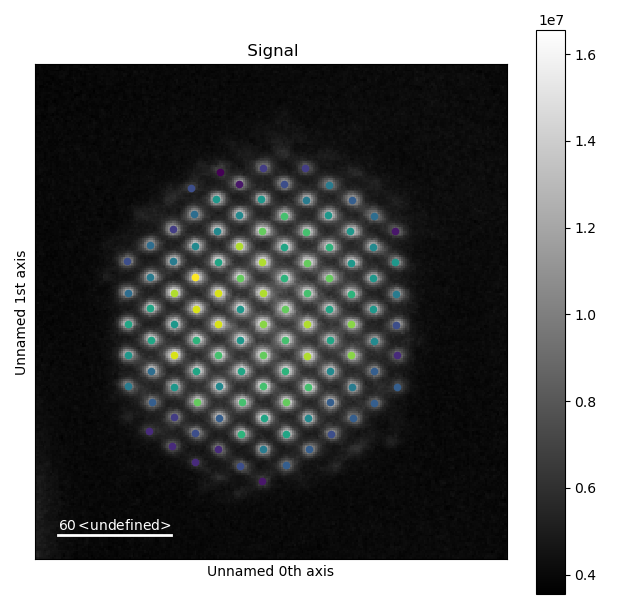

<IPython.core.display.Javascript object>


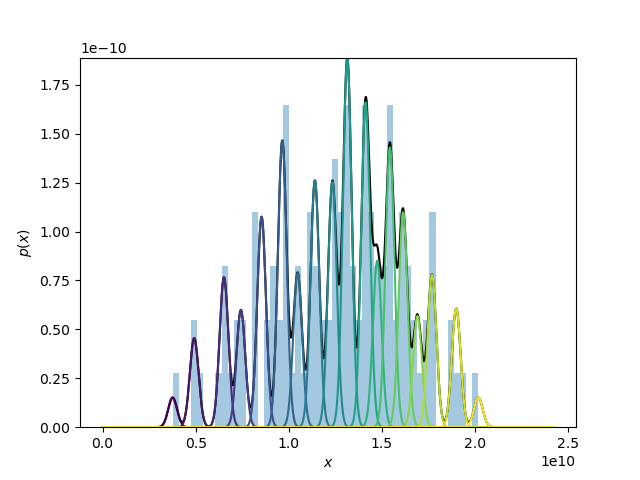

In [25]:
quant_lattice2 = am.quant.statistical_quant(summed_data,sublattice, models[17], 18)

In [30]:
quant_lattice.sublattice_list

[<Sublattice,  (atoms:5,planes:0)>,
 <Sublattice,  (atoms:13,planes:0)>,
 <Sublattice,  (atoms:18,planes:0)>,
 <Sublattice,  (atoms:8,planes:0)>,
 <Sublattice,  (atoms:16,planes:0)>,
 <Sublattice,  (atoms:9,planes:0)>,
 <Sublattice,  (atoms:19,planes:0)>,
 <Sublattice,  (atoms:4,planes:0)>,
 <Sublattice,  (atoms:8,planes:0)>,
 <Sublattice,  (atoms:11,planes:0)>]

In [2]:
mat_contents = io.loadmat(r'U:\Pt data from Aakash\Processed/005B 13uA RevSTEM90 ADF1.dm3_252x264x40.mat')

C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\envs\atomapdev\lib\site-packages\scipy\io\matlab\mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Dec 18 17:39:52 2015',
 '__version__': '1.0',
 '__globals__': [],
 'filename': array(['005B 13uA RevSTEM90 ADF1.dm3_252x264x40.dm3'], dtype='<U43'),
 'pixelWidth': array([[0.01705]]),
 'calibrationPlanes': array([[1, 1, 1]], dtype=uint8),
 'offsetDetector': array([[0, 0]], dtype=uint8),
 'version_string': array(['AbsoluteIntegrator v1.6.4'], dtype='<U25'),
 'loadSimulation': array([[0]], dtype=uint8),
 'faradayCurrentImaging': array([[7.3125]]),
 'faradayCurrentDetector': array([[1]], dtype=uint8),
 'weightDetector': array([[1]], dtype=uint8),
 'innerAngle': array([[51.73]]),
 'TDSexponent': array([[3.9805]]),
 'analyse_CCD_flux': array([[0]], dtype=uint8),
 'convergence_angle': array([[22.48]]),
 'best_size': array([[13]], dtype=uint8),
 'refinePositions': array([[0]], dtype=uint8),
 'removeZeroSpot': array([[0]], dtype=uint8),
 'manualPixelWidth': array([[0.01705]]),
 'latticeParameter': array([[0.392]]),
 'subt

In [14]:
plt.imshow(mat_contents['intensityRecord'])

In [13]:
%matplotlib qt

In [15]:
lib_contents = io.loadmat(r'U:\Pt data from Aakash\Processed/library 51.73-248.41mrad.mat')

In [22]:
lib_contents['pt_library_51mrad_dec2015']

array([[ 1.   ,  2.227],
       [ 2.   ,  5.324],
       [ 3.   ,  8.779],
       [ 4.   , 12.575],
       [ 5.   , 16.422],
       [ 6.   , 20.174],
       [ 7.   , 23.039],
       [ 8.   , 26.262],
       [ 9.   , 28.667],
       [10.   , 31.264],
       [11.   , 34.104],
       [12.   , 36.824],
       [13.   , 40.123],
       [14.   , 43.492],
       [15.   , 46.262],
       [16.   , 49.49 ],
       [17.   , 52.13 ],
       [18.   , 54.792],
       [19.   , 57.425],
       [20.   , 59.66 ],
       [21.   , 61.869],
       [22.   , 64.274],
       [23.   , 66.527],
       [24.   , 68.704],
       [25.   , 70.794],
       [26.   , 73.119],
       [27.   , 74.97 ],
       [28.   , 76.951],
       [29.   , 78.885],
       [30.   , 80.826]])

In [28]:
def find_number_atoms(value):
    array = np.asarray(lib_contents['pt_library_51mrad_dec2015'])
    idx = (np.abs(lib_contents['pt_library_51mrad_dec2015'][:,1] - value)).argmin()
    return lib_contents['pt_library_51mrad_dec2015'][idx,0]

In [29]:
find_number_atoms(78)

29.0

In [34]:
num_atoms = np.reshape(np.array([find_number_atoms(x) for x in np.ravel(mat_contents['intensityRecord'])]),(264,252))

In [32]:
mat_contents['intensityRecord'].shape

(264, 252)

In [55]:
plt.imshow(num_atoms)